# "50 startups."

### _"Predict which companies to invest for maximizing profit" (Regression task)._

## Table of Contents


## Part 0: Introduction

### Overview
The dataset that's we see here contains data about 50 startups. It has 7 columns: “ID”, “R&D Spend”, “Administration”, “Marketing Spend”, “State”, “Category”  “Profit”.

    
**Метаданные:**
    
* **ID** - startup ID

* **R&D Spend** - how much each startup spends on Research and Development

* **Administration** - how much they spend on Administration cost

* **Marketing Spend** - how much they spend on Marketing

* **State** - which state the startup is based in

* **Category** - which business category the startup belong to

* **Profit** - the profit made by the startup
   

### Questions:
    

* #### Predict which companies to invest for maximizing profit (choose model with the best score; create predictions; choose companies)


## [Part 1: Import, Load Data](#Part-1:-Import,-Load-Data.)
* ### Import libraries, Read data from ‘.csv’ file

## [Part 2: Exploratory Data Analysis](#Part-2:-Exploratory-Data-Analysis.)
* ### Info, Head
* ### Observation of target variable (describe + visualisation:distplot)
* ### Numerical and Categorical features
    * #### List of Numerical and Categorical features
* ### Missing Data
    * #### List of data features with missing values  
    * #### Filling missing values
* ### Numerical and Categorical features    
    * #### Visualisation  of Numerical and categorical features (regplot + barplot)

## [Part 3: Data Wrangling and Transformation](#Part-3:-Data-Wrangling-and-Transformation.)
* ### One-Hot Encoding 
* ### Standard Scaler (optional)
* ### Creating datasets for ML part
* ### 'Train\Test' splitting method

## [Part 4: Machine Learning](#Part-4:-Machine-Learning.)
* ### ML Models (Linear regression, Gradient Boosting Regression)
* ### Build, train, evaluate and visualise models
* ### Creating final predictions with Test set
* ### Model comparison


## [Conclusion](#Conclusion.)
* ### Submission of ‘.csv’ file with predictions

## Part 1: Import, Load Data.

* ### Import 

In [9]:
# import standard libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
from scipy import stats    
# import models and metrics
from sklearn import metrics, linear_model, model_selection
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

* ### Load Data

In [2]:
# read data from '.csv' files
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
# identify target
target = train['Profit']

## Part 2: Exploratory Data Analysis.

* ### Info

In [3]:
# print the full summary of the Train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               50 non-null     int64  
 1   R&D Spend        48 non-null     float64
 2   Administration   50 non-null     float64
 3   Marketing Spend  47 non-null     float64
 4   State            50 non-null     object 
 5   Category         49 non-null     object 
 6   Profit           50 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 2.9+ KB


In [4]:
# print the full summary of the Test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               50 non-null     int64  
 1   R&D Spend        48 non-null     float64
 2   Administration   48 non-null     float64
 3   Marketing Spend  50 non-null     float64
 4   State            49 non-null     object 
 5   Category         50 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 2.5+ KB


* ### Head

In [5]:
# preview of the first 5 lines of the loaded Train data 
test.head()

,ID,R&D Spend,Administration,Marketing Spend,State,Category
0,0,165349.20,136897.80,471784.10,New York,Industrials
1,1,162597.70,151377.59,443898.53,California,Technology
2,2,153441.51,101145.55,407934.54,Florida,Healthcare
3,3,144372.41,118671.85,383199.62,New York,Financials
4,4,142107.34,91391.77,366168.42,Florida,Industrials


In [6]:

train = train.dropna(subset=['R&D Spend', 'Marketing Spend'])
test = test.dropna(subset=['R&D Spend', 'Marketing Spend'])
target = train['Profit']
id = test['ID']
test = test.drop(['ID','Category','State','Administration'], axis=1)

train=train.drop(['ID','Category','State','Administration','Profit'], axis=1)

train.shape, target.shape, test.shape , id.shape



((46, 2), (46,), (48, 2), (48,))

In [7]:
X = train

# set 'y' for the target 'Profit'
y = target

# 'X_Test' for features of scaled Test dataset 'sc_test'
X_Test = test
X.shape , y.shape, X_Test.shape

((46, 2), (46,), (48, 2))

In [8]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
X_train.shape, X_test.shape

((32, 2), (14, 2))

In [12]:
# Linear Regression model

R, L, EN, LR  = Ridge(), Lasso(), ElasticNet(), LinearRegression()
RFR, GBR = RandomForestRegressor(), GradientBoostingRegressor()
SVR_M = SVR()
KNR = KNeighborsRegressor()
MLPR = MLPRegressor()
models = (R, L, EN, LR, RFR, GBR, SVR_M, KNR, MLPR)
models_names = ('Ridge','Lasso','ElasticNet','LinearRegression','RandomForestRegressor','GradientBoostingRegressor','SVR','KNeighborsRegressor','MLPRegressor')
# Model Training
predictions = list()


# Model Prediction
for model in models:
    model.fit(X_train,y_train)
    predictions.append(model.predict(X_test))

In [21]:
metrics_df = pd.DataFrame(columns=['Model', 'r2score', 'MAE', 'MSE', 'RMSE', 'MSLE', 'RMSLE'])
for i in range(len(models)):
    models[i].score(X_test, y_test)

# Model Metrics
    Metric = pd.DataFrame({'Model': f'{models_names[i]}',
                              'r2score':r2_score(y_test,predictions[i]),
                              'MAE': metrics.mean_absolute_error (y_test,predictions[i]),
                              'MSE': metrics.mean_squared_error(y_test,predictions[i]),
                              'RMSE': np.sqrt(metrics.mean_squared_error(y_test,predictions[i])),
                              'MSLE': metrics.mean_squared_log_error(y_test,predictions[i]),
                              'RMSLE':np.sqrt(metrics.mean_squared_log_error(y_test,predictions[i]))             
                              },index=[i+1])

    metrics_df = pd.concat([metrics_df, Metric])
metrics_df

C:\Users\Dell\AppData\Local\Temp\ipykernel_11712\3230904573.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_df = pd.concat([metrics_df, Metric])


,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Ridge,0.956623,5735.199624,4.627969e+07,6802.917561,0.002859,0.053470
2,Lasso,0.956623,5735.199630,4.627969e+07,6802.917560,0.002859,0.053470
3,ElasticNet,0.956623,5735.199626,4.627969e+07,6802.917562,0.002859,0.053470
4,LinearRegression,0.956623,5735.199624,4.627969e+07,6802.917561,0.002859,0.053470
5,RandomForestRegressor,0.958218,6106.904229,4.457762e+07,6676.647612,0.003494,0.059111
6,GradientBoostingRegressor,0.951718,6045.705573,5.151198e+07,7177.185022,0.003638,0.060314
7,SVR,-0.000829,26060.100767,1.067792e+09,32677.081696,0.071600,0.267582
8,KNeighborsRegressor,0.907042,9364.294286,9.917735e+07,9958.782571,0.008192,0.090512
9,MLPRegressor,-0.193203,31108.642628,1.273037e+09,35679.637325,0.315511,0.561704


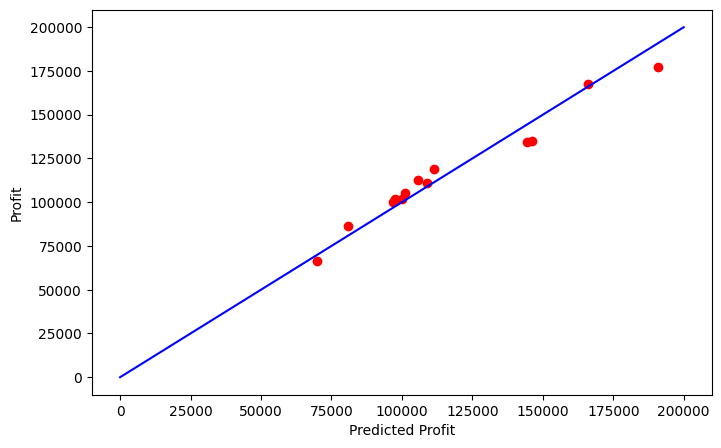

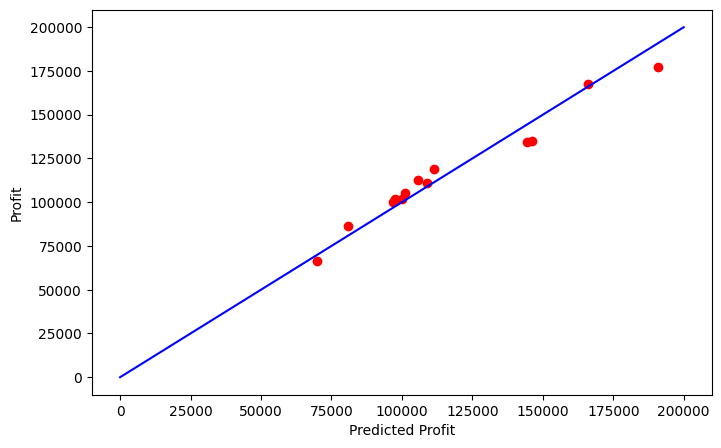

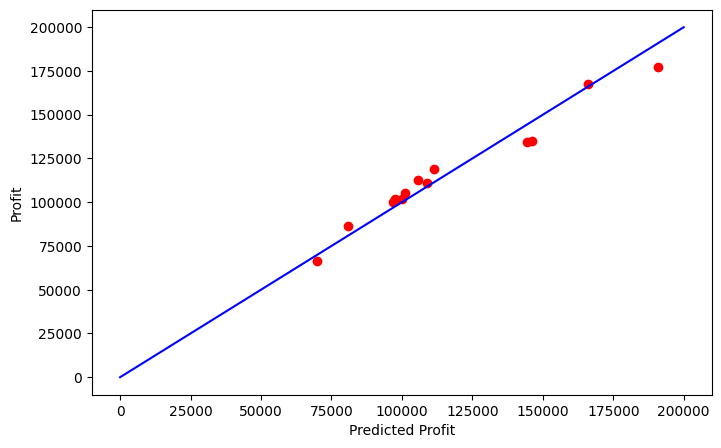

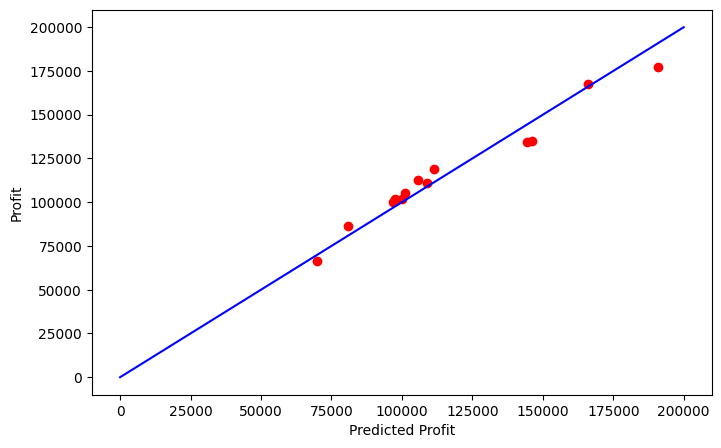

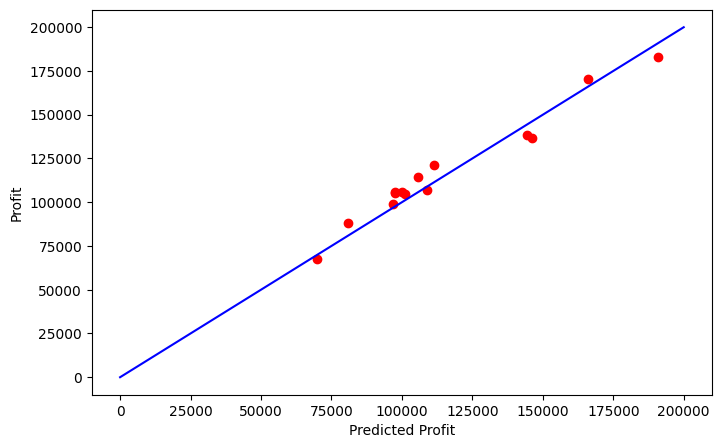

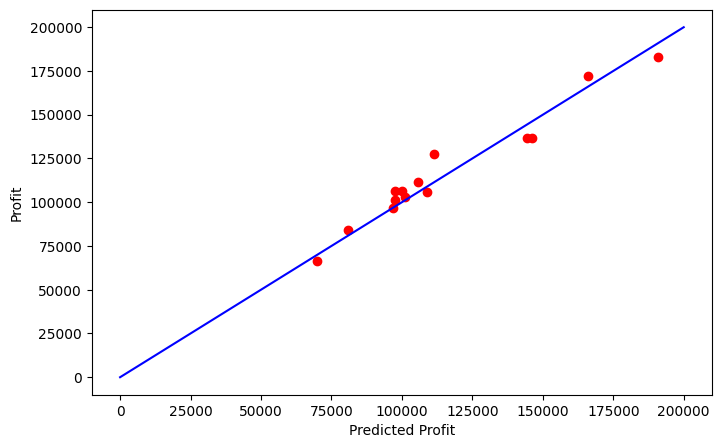

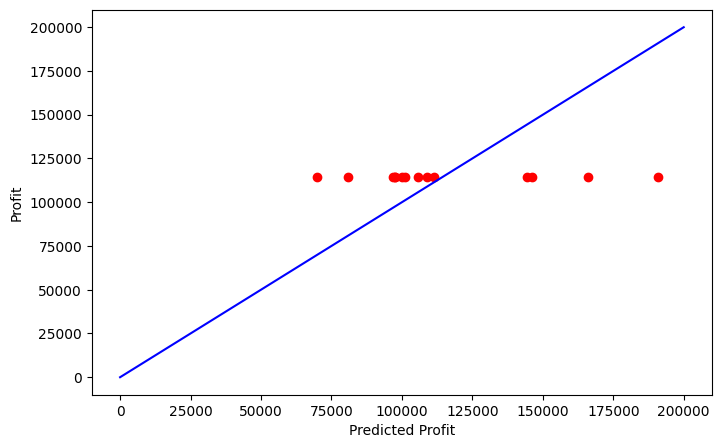

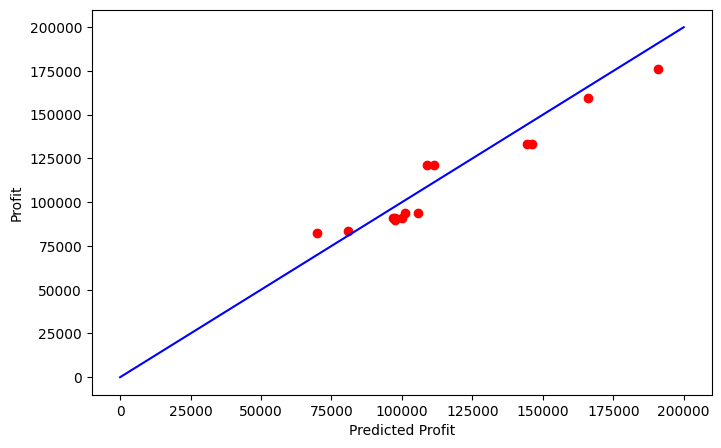

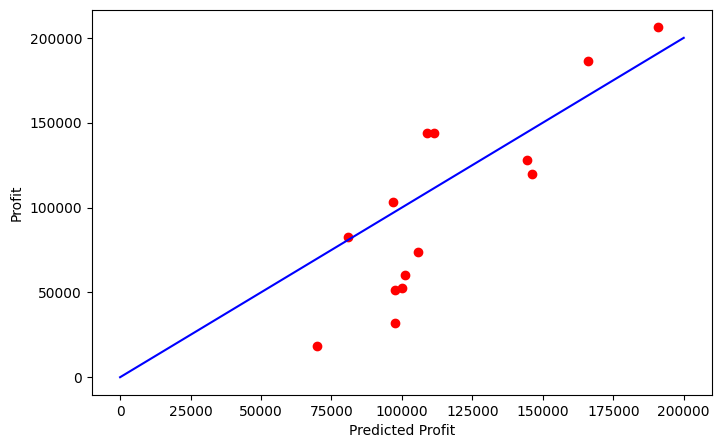

In [22]:
# visualisation of Train dataset predictions
for i in range(len(models)):
# Plot outputs
    plt.figure(figsize=(8,5))
    pl.plot(y_test, predictions[i],'ro')
    pl.plot([0,200000],[0,200000],'b-')
    pl.xlabel('Predicted Profit')
    pl.ylabel('Profit')
    pl.show()

In [25]:
# preview of the first 5 lines of the loaded Test data 
metrics_df1 = pd.DataFrame(columns=['Model', 'r2score', 'MAE', 'MSE', 'RMSE', 'MSLE', 'RMSLE'])
for i in range(len(models)):
    
    prediction = models[i].predict(train)
# Model Metrics
    Metric = pd.DataFrame({'Model': f'{models_names[i]}',
                              'r2score':r2_score(target,prediction),
                              'MAE': metrics.mean_absolute_error (target,prediction),
                              'MSE': metrics.mean_squared_error(target,prediction),
                              'RMSE': np.sqrt(metrics.mean_squared_error(target,prediction)),
                              'MSLE': metrics.mean_squared_log_error(target,prediction),
                              'RMSLE':np.sqrt(metrics.mean_squared_log_error(target,prediction))             
                              },index=[i+1])

    metrics_df1 = pd.concat([metrics_df1, Metric])
metrics_df1.sort_values(by='r2score', ascending=False)

C:\Users\Dell\AppData\Local\Temp\ipykernel_11712\1077194746.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_df1 = pd.concat([metrics_df1, Metric])


,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
6,GradientBoostingRegressor,0.987561,2000.774312,1.573527e+07,3966.770157,0.001113,0.033362
5,RandomForestRegressor,0.979671,3970.106917,2.571664e+07,5071.157439,0.003186,0.056448
2,Lasso,0.958371,5918.574301,5.266076e+07,7256.773684,0.004880,0.069859
4,LinearRegression,0.958371,5918.574297,5.266076e+07,7256.773685,0.004880,0.069859
1,Ridge,0.958371,5918.574297,5.266076e+07,7256.773685,0.004880,0.069859
3,ElasticNet,0.958371,5918.574298,5.266076e+07,7256.773685,0.004880,0.069859
8,KNeighborsRegressor,0.834522,10211.339478,2.093308e+08,14468.269511,0.022764,0.150879
9,MLPRegressor,0.170578,24586.900348,1.049227e+09,32391.779843,0.553616,0.744054
7,SVR,-0.005352,29112.881229,1.271781e+09,35662.039630,0.097960,0.312986


* ### Observation of target variable

In [26]:
# target variable
GBR = models[5]
test_pred = GBR.predict(test)
test_pred

array([192082.90000758, 191698.68693858, 182934.12005505, 182934.12005505,
       172132.59947594, 156966.08555025, 156019.32796665, 155724.33362867,
       152108.01571223, 149895.77262387, 136981.9160822 , 136981.9160822 ,
       141076.94497613, 134101.7436008 , 132750.47801474, 130105.83124796,
       126538.94981561, 125873.12465348, 124489.48077157, 130731.76216614,
       117869.27924679, 127679.2728776 , 110397.80362185, 105689.02588185,
       109078.99838206, 107053.42120222, 111566.33125992, 105355.97173541,
       103264.26556616, 103264.26556616, 106615.9440849 , 106615.9440849 ,
       101543.61860697,  96718.99050596,  96718.99050596,  96640.67805286,
        90309.48462277,  90381.17041117,  80869.49115563,  84309.47654182,
        80506.73297405,  77691.46071083,  71649.35134694,  66391.34587064,
        65621.50845376,  64768.33912313,  49735.60498436,  61992.0468504 ])

In [40]:
# visualisation of 'Profit' distribution

test['Profit'] = np.round(test_pred, decimals=2)

test


,ID,R&D Spend,Marketing Spend,Profit
0,0,165349.20,471784.10,192082.90
1,1,162597.70,443898.53,191698.69
2,2,153441.51,407934.54,182934.12
3,3,144372.41,383199.62,182934.12
4,4,142107.34,366168.42,172132.60
5,5,131876.90,362861.36,156966.09
6,6,134615.46,127716.82,156019.33
7,7,130298.13,323876.68,155724.33
8,8,120542.52,311613.29,152108.02
9,9,123334.88,304981.62,149895.77


In [39]:
test.to_csv('StartupPredictions.csv', index=False)
